<a href="https://colab.research.google.com/github/DominicWanjala/DominicWanjala.github.io/blob/main/Assino_datascience.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
ddata  = pd.read_csv('/content/assino_data_science.csv')
ddata.head(10)

,Number_of_Casualties,Engine_Capacity_(CC)
0,1,-1
1,1,8268
2,1,8300
3,1,1762
4,1,1769
5,1,85
6,1,2976
7,2,124
8,2,-1
9,5,4266


In [ ]:
duplicates_casualties = ddata[ddata['Number_of_Casualties'].duplicated()]
duplicates_engine = ddata[ddata['Engine_Capacity_(CC)'].duplicated()]
print(duplicates_casualties)
print(duplicates_engine)

         Number_of_Casualties  Engine_Capacity_(CC)
1                           1                  8268
2                           1                  8300
3                           1                  1762
4                           1                  1769
5                           1                    85
...                       ...                   ...
1048570                     2                  5861
1048571                     1                  2470
1048572                     1                    -1
1048573                     1                  1868
1048574                     1                   998

[1048534 rows x 2 columns]
         Number_of_Casualties  Engine_Capacity_(CC)
8                           2                    -1
12                          1                    -1
13                          1                  8268
14                          2                    -1
17                          1                   124
...                       ...       

In [ ]:
unique_values = ddata.value_counts()
print(unique_values)

Number_of_Casualties  Engine_Capacity_(CC)
1                     -1                      233866
2                     -1                       50909
1                      1598                    27095
                       1998                    21987
                       1796                    20150
                                               ...  
2                      10100                       1
                       10298                       1
                       10500                       1
                       10520                       1
68                    -1                           1
Length: 5992, dtype: int64


In [ ]:
null = ddata.isnull().sum()
print(null)

Number_of_Casualties    0
Engine_Capacity_(CC)    0
dtype: int64


In [ ]:
ddata['Engine_Capacity_(CC)'].replace(-1,400)

0           400
1          8268
2          8300
3          1762
4          1769
           ... 
1048570    5861
1048571    2470
1048572     400
1048573    1868
1048574     998
Name: Engine_Capacity_(CC), Length: 1048575, dtype: int64

In [ ]:
summary = ddata.describe()
print(ddata.info())
print(summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 2 columns):
 #   Column                Non-Null Count    Dtype
---  ------                --------------    -----
 0   Number_of_Casualties  1048575 non-null  int64
 1   Engine_Capacity_(CC)  1048575 non-null  int64
dtypes: int64(2)
memory usage: 16.0 MB
None
       Number_of_Casualties  Engine_Capacity_(CC)
count          1.048575e+06          1.048575e+06
mean           1.359930e+00          1.358289e+03
std            8.223645e-01          1.714334e+03
min            1.000000e+00         -1.000000e+00
25%            1.000000e+00         -1.000000e+00
50%            1.000000e+00          1.360000e+03
75%            1.000000e+00          1.834000e+03
max            6.800000e+01          9.999900e+04


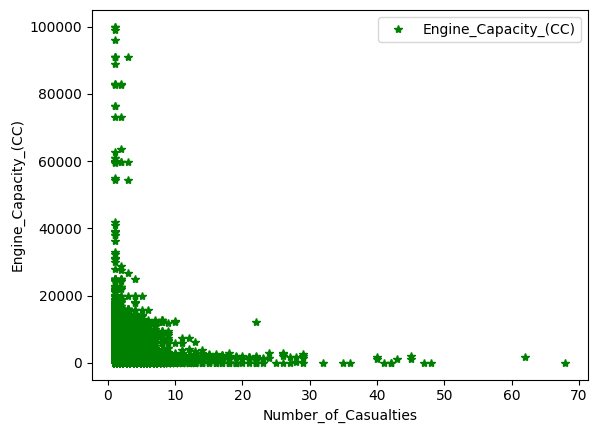

In [ ]:
import matplotlib.pyplot as plt

variables = ddata.loc[:, ['Number_of_Casualties', 'Engine_Capacity_(CC)']]
variables.plot(x='Number_of_Casualties', y='Engine_Capacity_(CC)',color='green', style='*')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Engine_Capacity_(CC)')
plt.show()


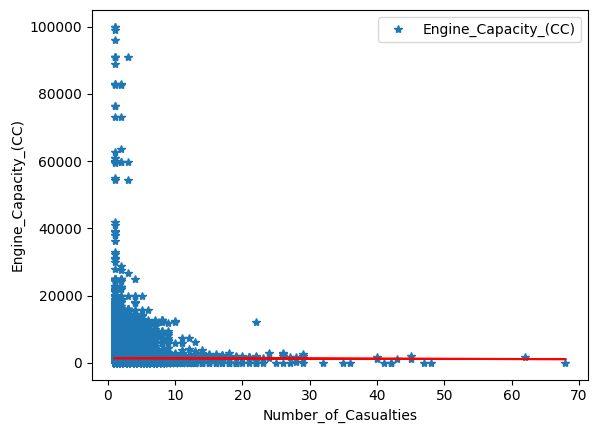

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
X = ddata[['Number_of_Casualties']].values
y = ddata['Engine_Capacity_(CC)'].values
regressor.fit(X, y)

ddata.plot(x='Number_of_Casualties', y='Engine_Capacity_(CC)', style='*')
plt.plot(X, regressor.predict(X), color='red', label='Regression line')
plt.xlabel('Number_of_Casualties')
plt.ylabel('Engine_Capacity_(CC)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
x = pd.DataFrame(ddata['Number_of_Casualties'])
y = pd.DataFrame(ddata['Engine_Capacity_(CC)'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

y_pred = regressor.predict(x_test)
y_test


,Engine_Capacity_(CC)
1045953,973
358409,-1
875012,1910
555046,-1
272972,1595
...,...
181305,1896
672605,1388
718823,1296
1006146,2776


In [ ]:
from sklearn import metrics
import numpy as np
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("MAE", mae)
print("MSE", mse)
print("RMSE", rmse)

MAE 957.9610326755534
MSE 2895348.4177695354
RMSE 1701.572336919455


In [ ]:
import joblib
import pickle
model = LinearRegression()
model.fit(x,y)
joblib.dump(model, 'assino_data_science.pkl')
with open('assino_data_science.pkl', 'wb') as file:
  pickle.dump(model, file)

In [ ]:
new_x = np.array([10,20,30,40,50]).reshape(-1,1)
model = joblib.load('assino_data_science.pkl')
predictions = model.predict(new_x)
new_data=pd.DataFrame({'x':new_x.flatten(), 'Predicted_y': predictions.flatten()})
print(new_data)


    x  Predicted_y
0  10  1322.893498
1  20  1281.927088
2  30  1240.960679
3  40  1199.994269
4  50  1159.027860


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
